In [3]:
"""Task 1: Create Your Own Dataset
Create a dataset to predict one of the following:
- House Price
- Car Price
- Student Exam Score

Requirements:
- Minimum 15 rows
- At least 2 input features
- Store data using Pandas DataFrame"""

'Task 1: Create Your Own Dataset\nCreate a dataset to predict one of the following:\n- House Price\n- Car Price\n- Student Exam Score\n\nRequirements:\n- Minimum 15 rows\n- At least 2 input features\n- Store data using Pandas DataFrame'

In [5]:
import pandas as pd
data = {
    "Size_sqft": [1000, 1200, 800, 1500, 2000, 1700, 1100, 900, 1300, 1600, 1800, 1400, 1250, 950, 2100],
    "Bedrooms": [2, 3, 2, 4, 5, 4, 3, 2, 3, 4, 4, 3, 3, 2, 5],
    "Price": [5000000, 6000000, 4000000, 8000000, 10000000, 8500000, 5500000, 4500000, 6500000, 7500000, 9000000, 7000000, 6200000, 4800000, 11000000]
}
df=pd.DataFrame(data)
print(df)

    Size_sqft  Bedrooms     Price
0        1000         2   5000000
1        1200         3   6000000
2         800         2   4000000
3        1500         4   8000000
4        2000         5  10000000
5        1700         4   8500000
6        1100         3   5500000
7         900         2   4500000
8        1300         3   6500000
9        1600         4   7500000
10       1800         4   9000000
11       1400         3   7000000
12       1250         3   6200000
13        950         2   4800000
14       2100         5  11000000


In [7]:
"""Task 2: Data Exploration
Print:
- First 5 rows
- Last 5 rows
- Dataset shape
- Data types
- Check for missing values"""

'Task 2: Data Exploration\nPrint:\n- First 5 rows\n- Last 5 rows\n- Dataset shape\n- Data types\n- Check for missing values'

In [9]:
df.head(5)

,Size_sqft,Bedrooms,Price
0,1000,2,5000000
1,1200,3,6000000
2,800,2,4000000
3,1500,4,8000000
4,2000,5,10000000


In [11]:
df.tail(5)

,Size_sqft,Bedrooms,Price
10,1800,4,9000000
11,1400,3,7000000
12,1250,3,6200000
13,950,2,4800000
14,2100,5,11000000


In [13]:
df.shape

(15, 3)

In [15]:
df.dtypes

Size_sqft    int64
Bedrooms     int64
Price        int64
dtype: object

In [17]:
df.isnull().sum()

Size_sqft    0
Bedrooms     0
Price        0
dtype: int64

In [19]:
'''Task 3: Data Visualization
Create:
- 1 Scatter Plot
- 1 Histogram
- 1 Boxplot
(Add proper titles and labels)'''

'Task 3: Data Visualization\nCreate:\n- 1 Scatter Plot\n- 1 Histogram\n- 1 Boxplot\n(Add proper titles and labels)'

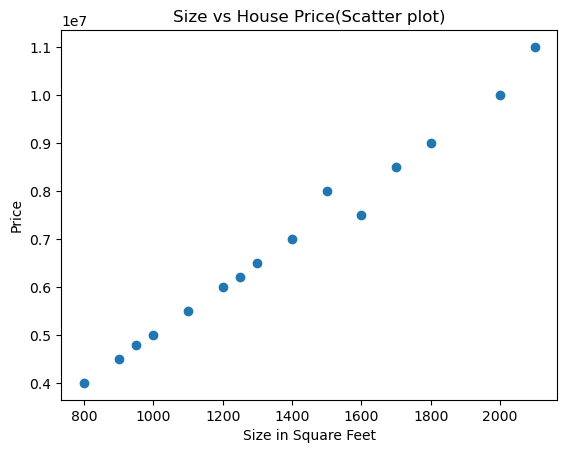

In [21]:
import matplotlib.pyplot as plt
plt.scatter(df["Size_sqft"], df["Price"])
plt.title("Size vs House Price(Scatter plot)")
plt.xlabel("Size in Square Feet")
plt.ylabel("Price")
plt.show()

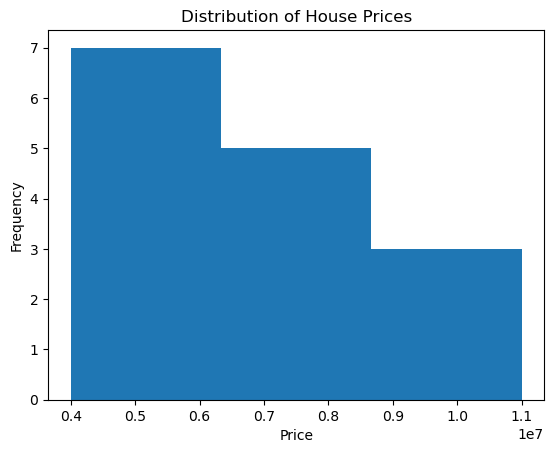

In [22]:
plt.hist(df["Price"], bins=3)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

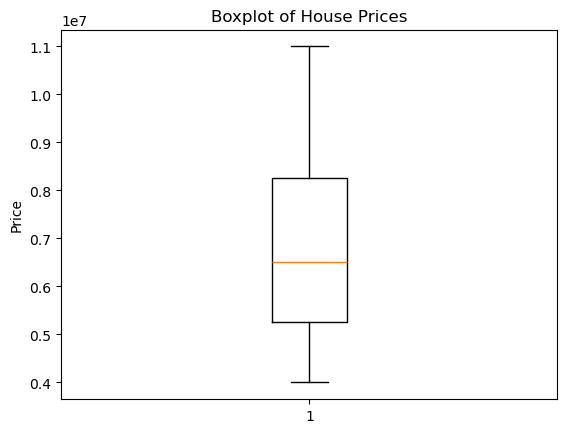

In [23]:
plt.boxplot(df["Price"])
plt.title("Boxplot of House Prices")
plt.ylabel("Price")
plt.show()


In [26]:
'''
Task 4: Train Linear Regression Model
- Split dataset into train and test set
- Train Linear Regression model
- Print MAE
- Print R2 Score
- Write 3–4 lines interpreting the results'''

'\nTask 4: Train Linear Regression Model\n- Split dataset into train and test set\n- Train Linear Regression model\n- Print MAE\n- Print R2 Score\n- Write 3–4 lines interpreting the results'

In [29]:
from sklearn.model_selection import train_test_split

X = df[["Size_sqft", "Bedrooms"]]
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [31]:
y_pred = model.predict(X_test)
print(X_test)
print(y_pred)

    Size_sqft  Bedrooms
9        1600         4
11       1400         3
0        1000         2
[8162387.23108952 6990284.52463567 4903816.79389313]


In [32]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R2 Score:", r2)


MAE: 256095.304186907
R2 Score: 0.8719707304260014


In [33]:
'''The Linear Regression model was trained to predict house prices based on size and number of bedrooms.
The MAE value indicates the average prediction error in price. 
The R² score shows how well the model explains the variance in the target variable.
A higher R² and lower MAE suggest the model performs well on unseen data.
R2 score is near to 1 ,which is near to perfect,87% variance'''


'The Linear Regression model was trained to predict house prices based on size and number of bedrooms.\nThe MAE value indicates the average prediction error in price. \nThe R² score shows how well the model explains the variance in the target variable.\nA higher R² and lower MAE suggest the model performs well on unseen data.\nR2 score is near to 1 ,which is near to perfect,87% variance'

In [34]:
'''Task 5: Feature Experiment
- Remove one feature and retrain
- Add one new meaningful feature and retrain
- Compare performance
- Mention which feature seems more important'''

'Task 5: Feature Experiment\n- Remove one feature and retrain\n- Add one new meaningful feature and retrain\n- Compare performance\n- Mention which feature seems more important'

In [43]:
'''step1 remove one feature'''
X = df[["Size_sqft"]]
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MAE: 240352.2818254611
R2: 0.8861775198495749


In [45]:
df["Total_Rooms"] = df["Bedrooms"] * 2
print(df)

    Size_sqft  Bedrooms     Price  Total_Rooms
0        1000         2   5000000            4
1        1200         3   6000000            6
2         800         2   4000000            4
3        1500         4   8000000            8
4        2000         5  10000000           10
5        1700         4   8500000            8
6        1100         3   5500000            6
7         900         2   4500000            4
8        1300         3   6500000            6
9        1600         4   7500000            8
10       1800         4   9000000            8
11       1400         3   7000000            6
12       1250         3   6200000            6
13        950         2   4800000            4
14       2100         5  11000000           10


In [47]:
X = df[["Size_sqft", "Bedrooms", "Total_Rooms"]]
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MAE: 256095.3041869076
R2: 0.8719707304260016


In [ ]:
'''Task 6: Overfitting Check
- Train model on full dataset without train-test split
- Compare results with proper split
- Explain what overfitting is'''

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

X = df[["Size_sqft", "Bedrooms"]]
y = df["Price"]

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

print("MAE (Full Data):", mean_absolute_error(y, y_pred))
print("R2 (Full Data):", r2_score(y, y_pred))

MAE (Full Data): 132234.3763249383
R2 (Full Data): 0.9885647088741673


In [ ]:
'''Overfitting occurs when a model learns training data too well, including noise and specific patterns, resulting in poor performance on unseen data.
Model already saw answers
It can memorize patterns
It doesn’t prove generalization
This can hide overfitting.'''

In [ ]:
'''Task 7: GitHub Submission
Upload notebook to GitHub with proper README including:
- Problem Statement
- Dataset Description
- Model Used
- Results
- Conclusion'''